In [33]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
X, y = fetch_olivetti_faces(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
forest = RandomForestClassifier(n_estimators=100, max_depth=20, max_samples=None)

In [27]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [28]:
acc_train = forest.score(X_train, y_train)
acc_test = forest.score(X_test, y_test)

acc_train, acc_test

(1.0, 0.85)

In [29]:
forest.estimators_[5].predict(X_test[:5])

array([19., 25., 17., 25., 10.])

In [30]:
forest.feature_importances_

array([2.69362452e-04, 3.80262562e-05, 0.00000000e+00, ...,
       0.00000000e+00, 8.93705965e-04, 7.57997739e-04])

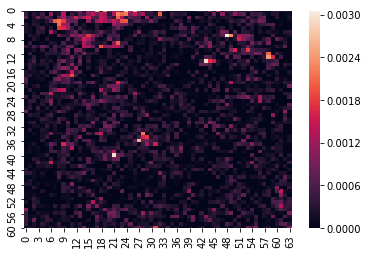

In [31]:
pixel_importance = forest.feature_importances_.reshape(64, 64)
sns.heatmap(pixel_importance)

In [36]:
m = KNeighborsClassifier()
bag = BaggingClassifier(m, n_estimators=100, max_samples=0.8, max_features=0.7)

In [37]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.7,
                  max_samples=0.8, n_estimators=100)

In [38]:
bag.score(X_train, y_train), bag.score(X_test, y_test)

(0.9266666666666666, 0.76)

In [40]:
bag.estimators_[0]

KNeighborsClassifier()

In [41]:
bag.estimators_samples_[0]

array([154, 280,   2, 199, 204,  54,  10,  46,   4, 206, 198,  86, 131,
       172, 275, 247,  57,  58, 293, 289, 197, 104, 276, 198, 163,  32,
       258, 114,  75, 225,  68, 188,   0, 286, 199, 236, 112, 152, 132,
        40,  52, 172,  84, 125, 177, 280,  37, 219, 285, 289,  74, 152,
        82,  21,  35, 255, 248,  99,  29, 207, 170, 166, 263, 125, 262,
       165, 111, 265, 163,  32, 266, 153, 262,  57,  20, 259,   1, 132,
        74,  85, 122,  88,  25,  19, 250, 105,  70,  64, 293, 156, 130,
        78, 185, 267,  60, 225, 274, 122, 289,  75,  24,  94, 139, 142,
        60, 183,  70, 232,  48, 249, 161, 222, 184, 235, 233,   2, 277,
       114, 265, 187,  73, 278,  43,  70, 157, 280,  68, 180, 105,  46,
       269,  48,   9,  28, 242,  38,  89, 186, 165, 266, 272, 226, 152,
        70, 288, 171,  21, 193,  35, 102, 135, 141, 175,  39, 161, 184,
       161, 146,  97, 287,  29, 241, 199,  47, 290, 105, 184,  43, 203,
        96,  99, 277,  46, 102, 170, 121, 284, 254, 252,  79, 16

In [42]:
bag.estimators_features_[0]

array([1891, 1646,  654, ..., 3661,  237, 1334])